<a href="https://colab.research.google.com/github/ludydulimi/My-interest/blob/Forage/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 - Exploratory Data Analysis

This notebook will walk you through this task interactively, meaning that once you've imported this notebook into `Google Colab`, you'll be able to run individual cells of code independantly, and see the results as you go.

This notebooks is designed for users that have an understanding of Python and data analysis. There will be some helper functions and initial setup code provided, but it will be up to you to perform the analysis and to draw insights!

---

## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In order to view, analyse and manipulate the dataset, we must load it into something called a `dataframe`, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called `Pandas`. We can install pandas with this command:

In [ ]:
!pip install pandas

And now we can import this package like so:

In [ ]:
import pandas as pd

---

## Section 2 - Data loading

Now that Google Drive is mounted, you can store the CSV file anywhere in your Drive and update the `path` variable below to access it within this notebook. Once we've updated the `path`, let's read this CSV file into a pandas dataframe and see what it looks like

In [ ]:
path = "/content/drive/MyDrive/Forage/cognizant/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


Using the `.head()` method allows us to see the top 5 (5 by default) rows within the dataframe. We can use `.tail()` to see the bottom 5. If you want to see more than 5 rows, simply enter a number into the parentheses, e.g. `head(10)` or `tail(10)`.

---

## Section 3 - Descriptive statistics

In this section, you should try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

To get you started an explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

After this, you should try to compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

---

## Section 4 - Visualisation

Now that you've computed some descriptive statistics of the dataset, let's create some visualisations. You may use any package that you wish for visualisation, however, some helper functions have been provided that make use of the `seaborn` package. If you wish to use these helper functions, ensure to run the below cells that install and import `seaborn`.

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [ ]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  corr = data.corr(method='pearson',numeric_only=True)
  corr.style.background_gradient(cmap='coolwarm')

In [ ]:
df.tail(10)

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
7819,abad87e6-5424-40cb-832d-afe5195fc3f2,2022-03-07 13:20:19,f4a73cc3-b383-4650-bfa5-970bdcadc737,cleaning products,premium,14.19,3,42.57,credit card
7820,731ab8a0-4943-4bb0-b3f4-adf97d14b210,2022-03-01 19:09:20,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,gold,14.19,3,42.57,debit card
7821,a8109d22-e192-41d4-911d-84c772a68013,2022-03-02 10:42:44,6c8d0a2a-576a-432f-a090-c123dee91aaa,cleaning products,gold,15.49,4,61.96,credit card
7822,6857feab-f2b1-4de7-bd4e-14a838591411,2022-03-04 11:06:33,364035ab-945a-4c34-9734-5167b787ae5c,cleaning products,standard,8.99,3,26.97,debit card
7823,60524862-cd12-47e8-aaa6-9a15e3f2c74d,2022-03-07 12:44:43,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,credit card
7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash
7828,afd70b4f-ee21-402d-8d8f-0d9e13c2bea6,2022-03-06 13:50:36,d6ccd088-11be-4c25-aa1f-ea87c01a04db,cleaning products,non-member,14.99,4,59.96,debit card


In [ ]:
df['total'].median()

14.97

In [ ]:
df['total'].mean()

19.70990547962703

In [ ]:
  corr = df.corr(method='pearson',numeric_only=True)

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,unit_price,quantity,total
unit_price,1.000000,0.024588,0.792018
quantity,0.024588,1.000000,0.521926
total,0.792018,0.521926,1.000000


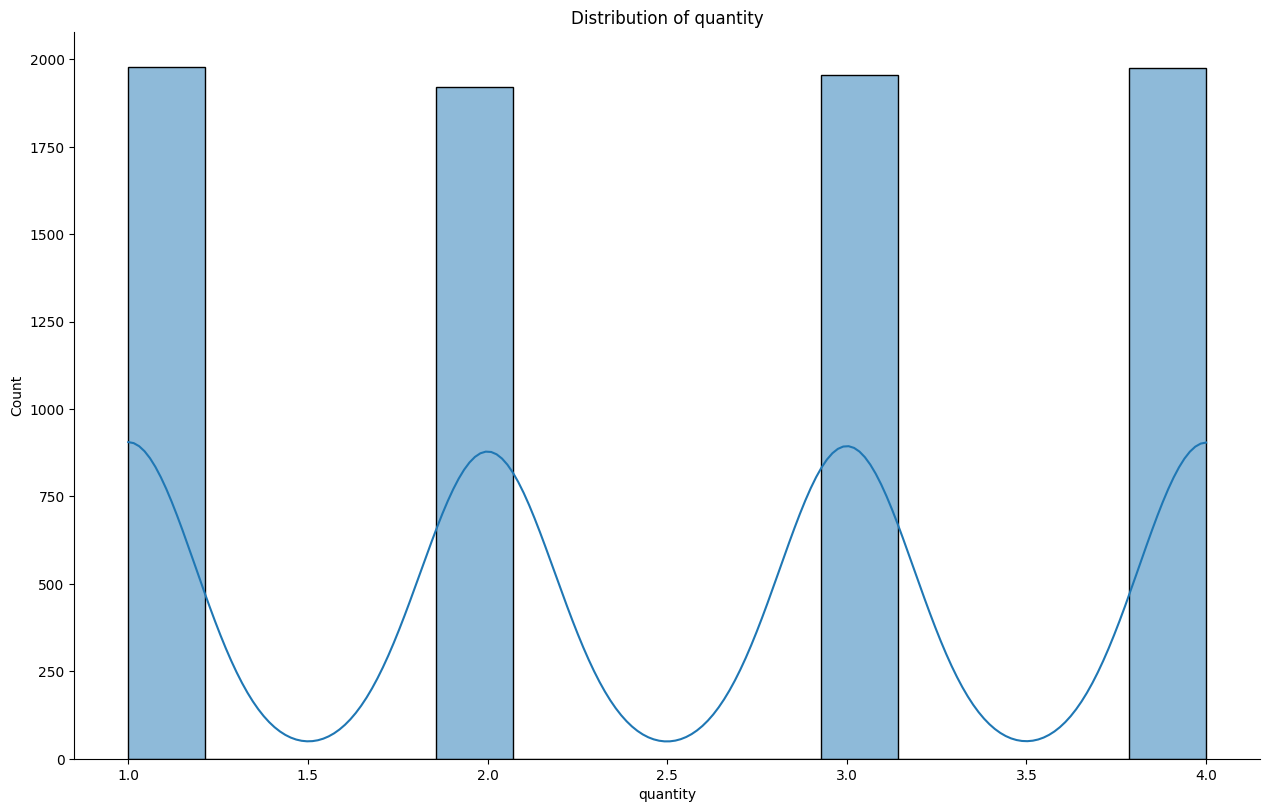

In [ ]:
plot_continuous_distribution(df,'quantity')

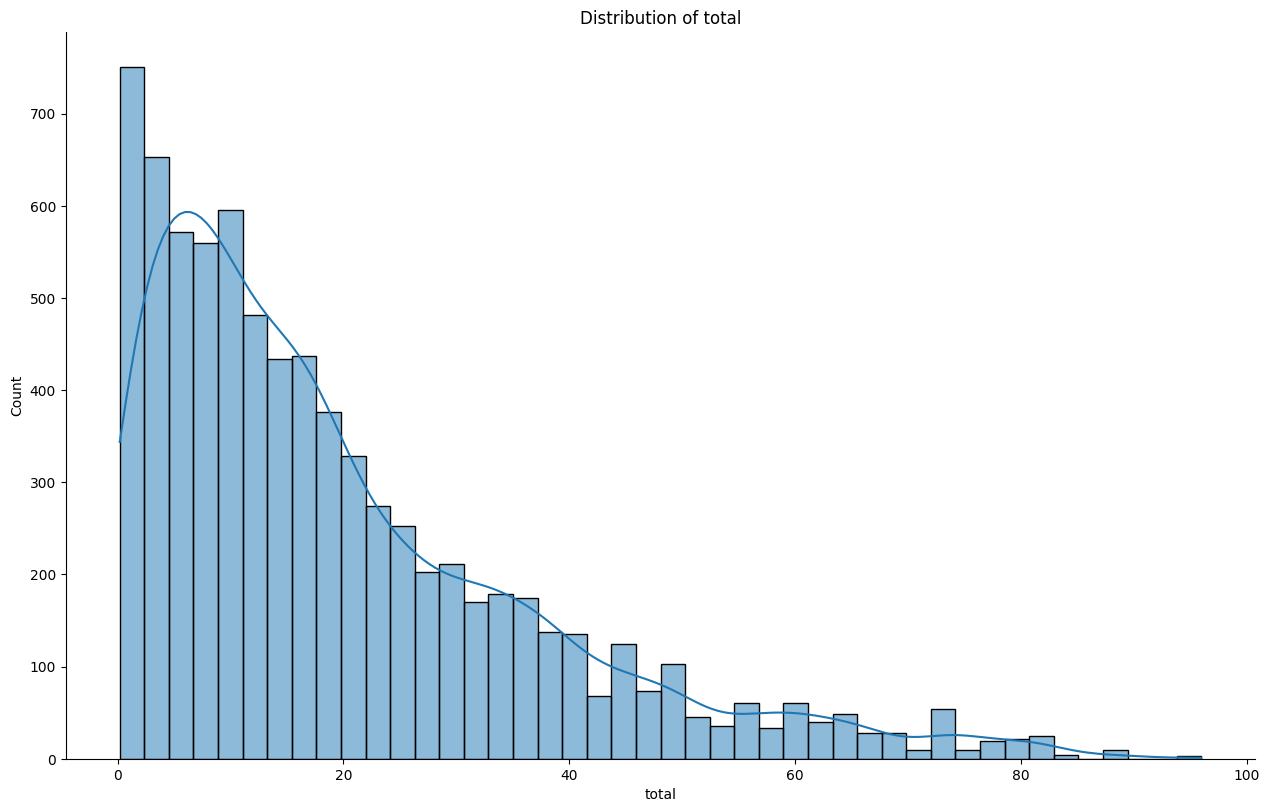

In [ ]:
plot_continuous_distribution(df,'total')

In [ ]:
df_cat=df.groupby('category')
df_cat.mean()

<ipython-input-17-f7ac8e628d48>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cat.mean()


,unit_price,quantity,total
category,,,
baby products,12.285536,2.424107,29.932902
baked goods,7.619797,2.458239,18.844718
baking,5.342273,2.454545,13.075076
beverages,12.624551,2.578073,32.992159
canned foods,6.269350,2.510441,15.646125
cheese,8.651775,2.672355,23.417304
cleaning products,12.802671,2.482877,32.478596
condiments and sauces,6.886685,2.486188,17.191160
dairy,7.980133,2.533333,20.137600


In [ ]:
df_cat[['quantity','total']].sum().sort_values(by=['total'],ascending=False)

,quantity,total
category,,
kitchen,955,14456.65
meat,939,14102.31
seafood,669,10754.81
medicine,602,10393.78
beverages,776,9930.64
cleaning products,725,9483.75
baked goods,1089,8348.21
dairy,950,7551.60
refrigerated items,1065,7436.45


In [ ]:
df_cat[['quantity','total']].sum().sort_values(by=['quantity'],ascending=False)

,quantity,total
category,,
fruit,2439,6124.21
vegetables,2124,5070.46
packaged foods,1280,6373.70
baked goods,1089,8348.21
canned foods,1082,6743.48
refrigerated items,1065,7436.45
kitchen,955,14456.65
dairy,950,7551.60
meat,939,14102.31


In [ ]:
df_ct=df.groupby('customer_type')

In [ ]:
df_ct['total'].sum()

customer_type
basic         29569.16
gold          29939.99
non-member    31755.24
premium       31655.68
standard      31388.78
Name: total, dtype: float64

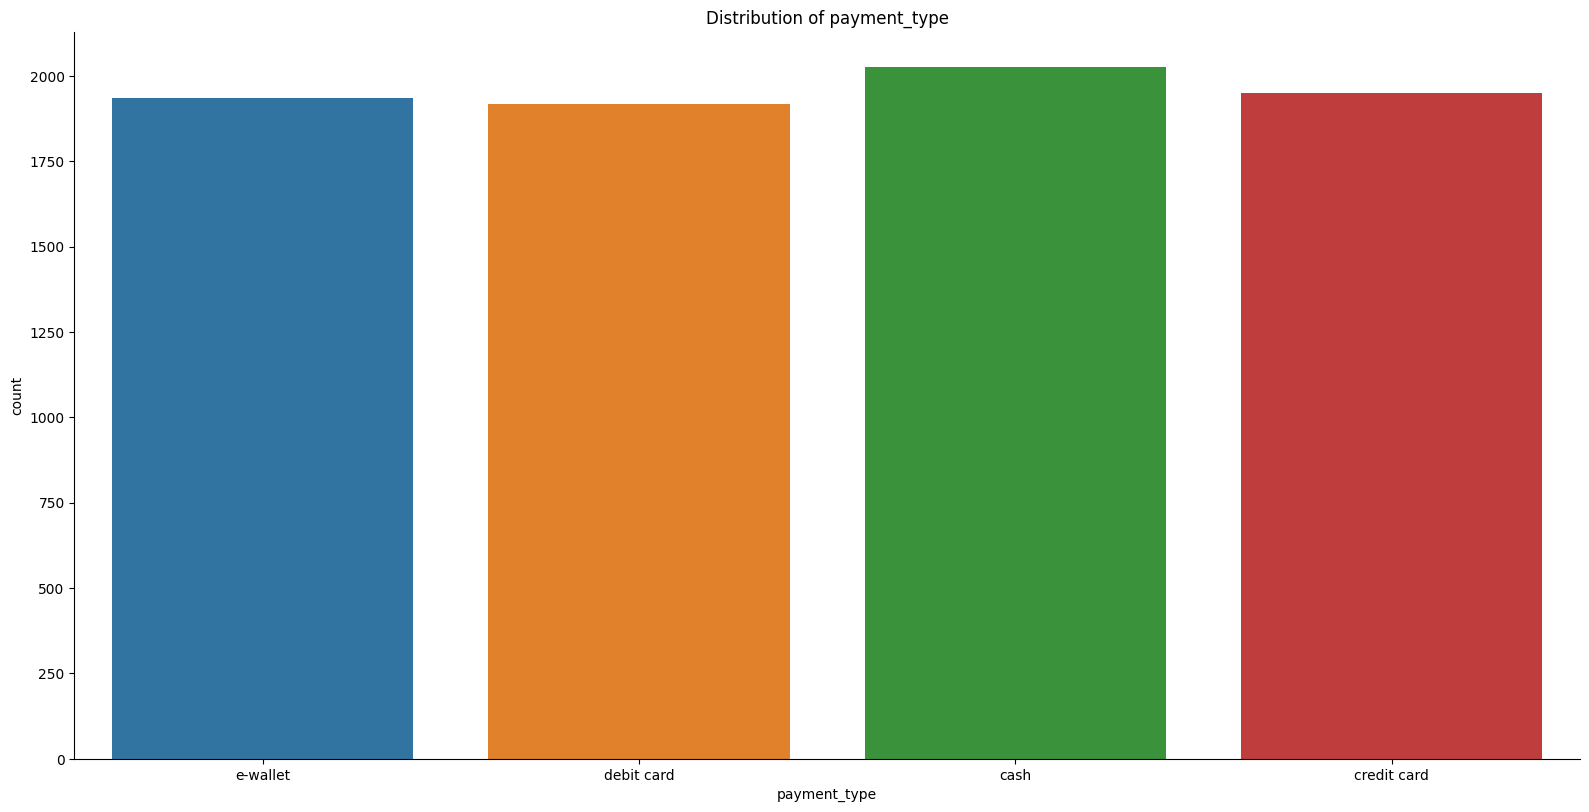

In [ ]:
plot_categorical_distribution(df,'payment_type')

In [ ]:
get_unique_values(df,'payment_type')

Column: payment_type has 4 unique values

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64


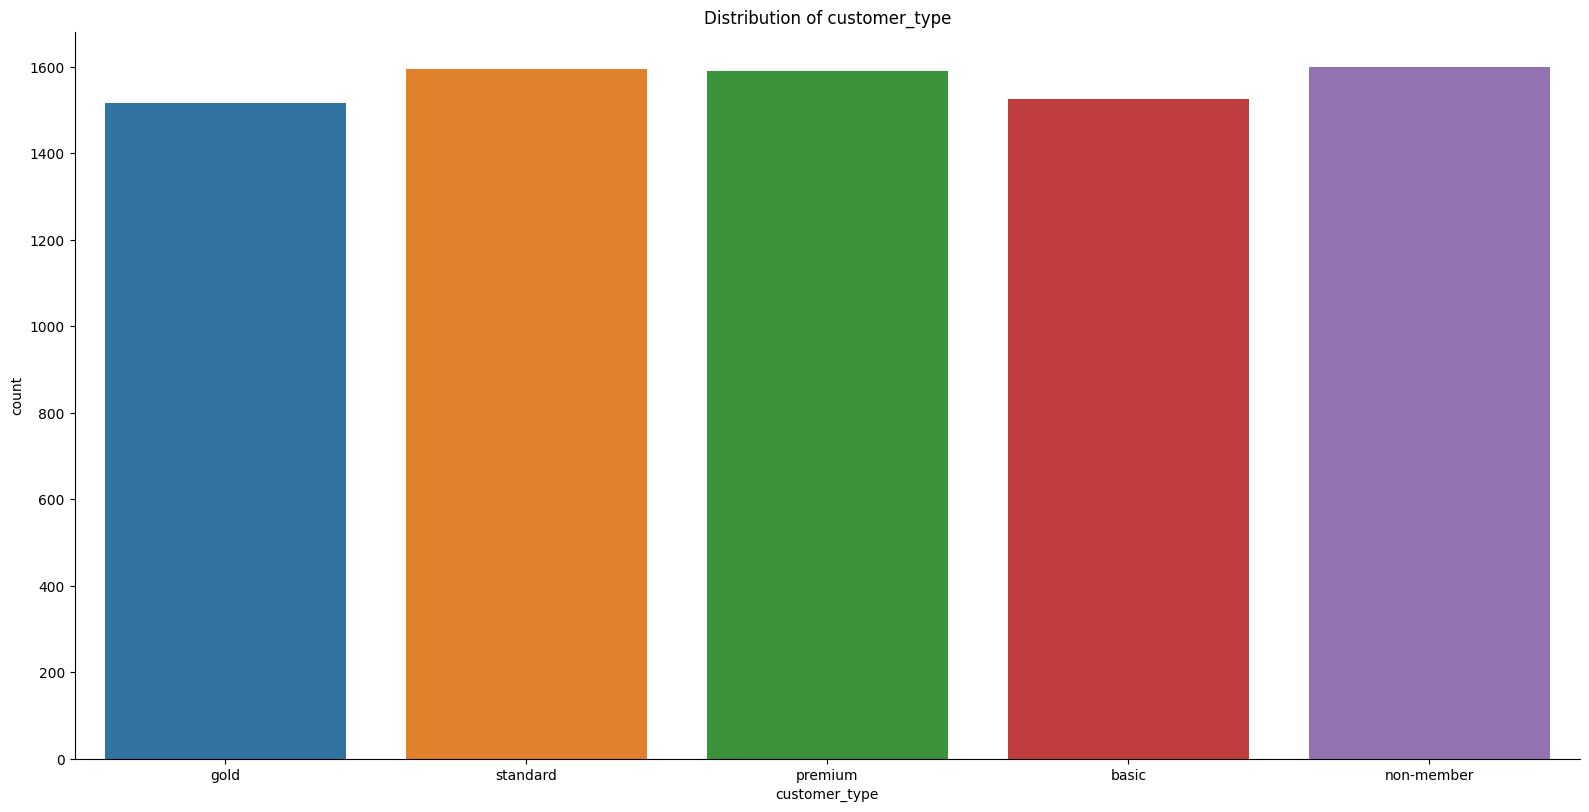

In [ ]:
plot_categorical_distribution(df,'customer_type')

In [ ]:
get_unique_values(df,'customer_type')

Column: customer_type has 5 unique values

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64


Now it is your chance to visualise the columns, give it your best shot! As well as simply visualising the columns, try to interpret what the results mean in the context of the client.

---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data.

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for

